# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [2]:
# Import our libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score


In [3]:
# Read our data into a dataframe 
data = pd.read_csv('datasets/data.csv')
data.shape


(6819, 96)

In [9]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [10]:
# separate the feature (x) and the target variable (y)
y = data['Bankrupt?']
x = data.drop(columns=['Bankrupt?'])

#split the dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y)

#init the scaler
scaler = StandardScaler()
#fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)
#transform
x_test_scaled = scaler.transform(x_test)

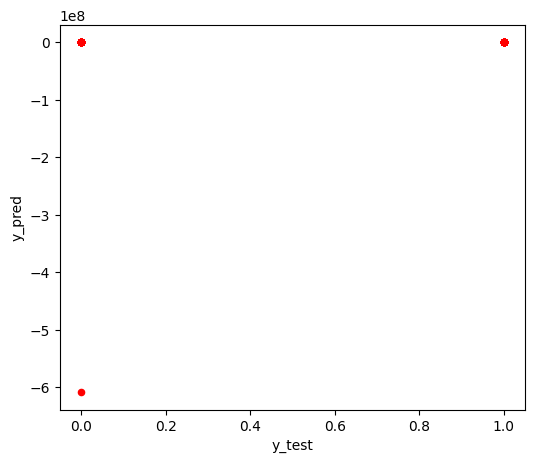


R2 (Linear Regression) = -6725896696706445.000
R2 (Ridge) = -6477551406833188.000
R2 (Lasso) = 0.152


In [11]:
# 1. LinearRegression() -> this applies mean centering internally to the data 
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

# Visually check the predicted and actual y values ​​of the test data.
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, s=20, c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# Calculate the R2 score
r2 = model.score(x_test_scaled, y_test)
print('\nR2 (Linear Regression) = {:.3f}'.format(r2))

# 2. Ridge regularization
model = Ridge(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Ridge) = {:.3f}'.format(r2))

# 3. Lasso regularization
model = Lasso(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Lasso) = {:.3f}'.format(r2))